# 케라스(Keras) 훑어보기

1.   전처리(Preprocessing)
    - Tokenizer() : 토큰화와 정수 인코딩(단어에 대한 인덱싱)을 위해 사용



In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer

t = Tokenizer()
fit_text = "Korea's nationwide COVID-19 rollout is expected pick up speed following a government decision to allow the use of the AstraZeneca for people aged over 65."
t.fit_on_texts([fit_text]) # vaccine 단어를 지우고 학습(Tokenizer)시킴

test_text = "Korea's nationwide COVID-19 vaccine rollout is expected pick up speed following a government decision to allow the use of the AstraZeneca vaccine for people aged over 65."
sequences = t.texts_to_sequences([test_text])[0] # vaccine 없이 Tokenizer한 t를 적용함

print('sequences : ', sequences) # 백신은 단어 집합(vocabulary)에 없으므로 출력되지 않는다.

print('word index : ', t.word_index) # 단어 집합(vocabulary) 출력

sequences :  [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 1, 18, 19, 1, 20, 21, 22, 23, 24, 25]
word index :  {'the': 1, "korea's": 2, 'nationwide': 3, 'covid': 4, '19': 5, 'rollout': 6, 'is': 7, 'expected': 8, 'pick': 9, 'up': 10, 'speed': 11, 'following': 12, 'a': 13, 'government': 14, 'decision': 15, 'to': 16, 'allow': 17, 'use': 18, 'of': 19, 'astrazeneca': 20, 'for': 21, 'people': 22, 'aged': 23, 'over': 24, '65': 25}


   - pad_sequence() : 패딩(padding) 작업

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
pad_sequences([[2, 3, 4, 5, 6, 7, 8], [9, 10, 11, 12, 13, 14, 15, 16, 17], [1, 18, 19, 1, 20, 21, 22, 23, 24, 25]], maxlen=3, padding='post')
# 전처리가 끝나서 각 단어에 대한 정수 인코딩이 끝났다고 가정하고, 3개의 데이터를 입력으로 합니다.

# 첫번째 인자 = 패딩을 진행할 데이터
# maxlen = 모든 데이터에 대해서 정규화 할 길이
# padding = 'pre'를 선택하면 앞에 0을 채우고 'post'를 선택하면 뒤에 0을 채움.

array([[ 6,  7,  8],
       [15, 16, 17],
       [23, 24, 25]], dtype=int32)

2. 워드 임베딩(Word Embedding)

워드 임베딩이란 텍스트 내의 단어들을 밀집 벡터(dense vector)로 만드는 것을 말한다.

    * Embedding() : 임베딩 층(embedding layer)을 만드는 역할, 정수 인코딩이 된 단어들을 입력을 받아서 임베딩을 수행

In [ ]:
import torch.nn as nn

nn.Embedding(7, 2).weight
# 첫번째 인자 = 단어 집합의 크기. 즉, 총 단어의 개수
# 두번째 인자 = 임베딩 벡터의 출력 차원. 결과로서 나오는 임베딩 벡터의 크기
# input_length = 입력 시퀀스의 길이


Parameter containing:
tensor([[-1.1511, -0.0951],
        [-0.1561,  0.6227],
        [ 0.4471,  0.1721],
        [ 1.0831,  0.6503],
        [ 0.9224,  1.8184],
        [ 0.0098,  1.6540],
        [ 0.1228, -0.6081]], requires_grad=True)

3. 모델링(Modeling)

    - Sequential() : 층을 구성하기 위해 사용. model로 선언한 뒤에 model.add()라는 코드를 통해 층을 단계적으로 추가

In [ ]:
from tensorflow.keras.models import Sequential
model = Sequential()
model.add(...) # 층 추가
model.add(...) # 층 추가
...

model = Sequential()
model.add(Embedding(vocabulary, output_dim, input_length))

  * Dense() : 전결합층(fully-conntected layer)을 추가

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
model = Sequential()

# 첫번째 인자 = 출력 뉴런의 수.
# input_dim = 입력 뉴런의 수. (입력의 차원)
# activation = 활성화 함수.
model.add(Dense(8, input_dim=4, activation='relu'))
# 첫번째 사용된 Dense()의 8이라는 값은 은닉층의 뉴런
model.add(Dense(1, activation='sigmoid')) # 출력층
# 두번째 Dense()는 input_dim 인자가 없음




  * summary() : 모델의 정보를 요약해서 보여

In [ ]:
model.summary()

4. 컴파일(Compile)과 훈련(Training)

    - compile() : 모델을 기계가 이해할 수 있도록 컴파일한다. 오차 함수와 최적화 방법, 메트릭 함수를 선택할 수 있다.


In [ ]:
from tensorflow.keras.layers import SimpleRNN, Embedding, Dense
from tensorflow.keras.models import Sequential
max_features = 10000

#  임베딩층, 은닉층, 출력층을 추가하여 모델을 설계한 후에, 마지막으로 컴파일 하는 과정
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32)) #RNN
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
# metrics : 훈련을 모니터링하기 위한 지표
''' mean_squared_error(평균 제곱 오차)
categorical_crossentropy (범주형 교차 엔트로피)
sparse_categorical_crossentropy	(정수 인코딩 된 상태에서 수행 가능)
binary_crossentropy(이항 교차 엔트로피) '''

' mean_squared_error(평균 제곱 오차)\ncategorical_crossentropy (범주형 교차 엔트로피)\nsparse_categorical_crossentropy\t(정수 인코딩 된 상태에서 수행 가능)\nbinary_crossentropy(이항 교차 엔트로피) '

   - fit() : 모델 학습

In [ ]:
# verbose = 학습 중 출력되는 문구를 설정
# - 0 : 아무 것도 출력하지 않는다.
# - 1 : 훈련의 진행도를 보여주는 진행 막대를 보여준다.
# - 2 : 미니 배치마다 손실 정보를 출력한다.
model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0, validation_data(X_val, y_val))

# validation_data(x_val, y_val) = 검증 데이터(validation data)를 사용할때
# 검증 데이터를 사용하면 각 에포크마다 검증 데이터의 정확도도 함께 출력되는데,
# 이 정확도는 훈련이 잘 되고 있는지를 보여줄 뿐이며 실제로 모델이 검증 데이터를 학습하지는 않는다.
# 검증 데이터의 loss가 낮아지다가 높아지기 시작하면 이는 과적합(overfitting)의 신호이다.

'''
validation_split= validation_data 대신 사용할 수 있다.
검증 데이터를 사용하는 것은 동일하지만, 별도로 존재하는 검증 데이터를 주는 것이 아니라 X_train과 y_train에서 일정 비율을 분리하여 이를 검증 데이터로 사용한다.

5. 평가(Evaluation)와 예측(Prediction)

    - evaluate() : 테스트 데이터를 통해 학습한 모델에 대한 정확도를 평가
    - predict() : 임의의 입력에 대한 모델의 출력값을 확인한다.

In [ ]:
model.evaluate(X_test, y_test, batch_size=32)

model.predict(X_input, batch_size=32)

6. 모델의 저장(Save)과 로드(Load)

    - save() : 인공 신경망 모델을 hdf5 파일에 저장
    - load_model() : 저장해둔 모델을 불러온다.

In [ ]:
model.save("model_name.h5")

from tensorflow.keras.models import load_model
model = load_model("model_name.h5")

# 케라스의 함수형 API(Keras Functional API)

1. sequential API로 만든 모델
- sequential API는 여러층을 공유하거나 다양한 종류의 입력과 출력을 사용하는 등의 복잡한 모델을 만드는 일을 하기에는 한계가 있다.

2. functional API로 만든 모델
- functional API는 각 층을 일종의 함수(function)로서 정의한다.
- 그리고 각 함수를 조합하기 위한 연산자들을 제공하는데, 이를 이용하여 신경망을 설계한다.
- sequential API와는 다르게 functional API에서는 입력 데이터의 크기(shape)를 인자로 입력층을 정의해주어야 한다.


    1) 전결합 피드 포워드 신경망(Fully-connected FFNN)
    입력의 차원이 1인 전결합 피드 포워드 신경망(Fully-connected FFNN) 구성

In [ ]:
from tensorflow.keras.layers import Input
# 10개의 입력을 받는 입력층
inputs = Input(shape=(10,))

# 은닉층과 출력층을 추가
inputs = Input(shape=(10,))
hidden1 = Dense(64, activation='relu')(inputs)
hidden2 = Dense(64, activation='relu')(hidden1)
output = Dense(1, activation='sigmoid')(hidden2)
# 아래 두 코드는 같은 의미를 가진다.
'''
encoder = Dense(128)(input)

encoder = Dense(128)
encoder(input)
'''

# 코드를 하나의 모델로 구성
model = Model(inputs=inputs, outputs=output)

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(data, labels)

# 다층 퍼셉트론(MultiLayer Perceptron, MLP)으로 텍스트 분류하기

- 20개 뉴스 그룹(Twenty Newsgroups) 데이터로 실습하기


In [ ]:
# LSA 챕터와 동일한 데이터 사용
from sklearn.datasets import fetch_20newsgroups
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical

newsdata = fetch_20newsgroups(subset = 'train') # 'train'을 기재하면 훈련 데이터만 리턴한다.
# subset의 값으로 'all'을 넣으면 전체 데이터인 18,846개의 샘플을 다운로드할 수 있다.


In [ ]:
print(newsdata.keys())  # 가지고 있는 속성 확인

print('훈련용 샘플의 개수 : {}'.format(len(newsdata.data)))
# 훈련 샘플 개수 확인
print('='*60)
print('총 주제의 개수 : {}'.format(len(newsdata.target_names)))
print(newsdata.target_names) # 뉴스 주제 20개

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])
훈련용 샘플의 개수 : 11314
총 주제의 개수 : 20
['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


In [ ]:
print('첫번째 샘플의 레이블 : {}'.format(newsdata.target[0]))
print('7번 레이블이 의미하는 주제 : {}'.format(newsdata.target_names[7]))

print('='*60)
print(newsdata.data[0]) # 첫번째 샘플 출력

첫번째 샘플의 레이블 : 7
7번 레이블이 의미하는 주제 : rec.autos
From: lerxst@wam.umd.edu (where's my thing)
Subject: WHAT car is this!?
Nntp-Posting-Host: rac3.wam.umd.edu
Organization: University of Maryland, College Park
Lines: 15

 I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.

Thanks,
- IL
   ---- brought to you by your neighborhood Lerxst ----







In [ ]:
data = pd.DataFrame(newsdata.data, columns = ['email']) # data로부터 데이터프레임 생성
data['target'] = pd.Series(newsdata.target) # target 열 추가
data[:5]

,email,target
0,From: lerxst@wam.umd.edu (where's my thing)\nS...,7
1,From: guykuo@carson.u.washington.edu (Guy Kuo)...,4
2,From: twillis@ec.ecn.purdue.edu (Thomas E Will...,4
3,From: jgreen@amber (Joe Green)\nSubject: Re: W...,1
4,From: jcm@head-cfa.harvard.edu (Jonathan McDow...,14


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11314 entries, 0 to 11313
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   email   11314 non-null  object
 1   target  11314 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 176.9+ KB


In [ ]:
data.isnull().values.any() # Null 값 확인

False

In [ ]:
# nunique()를 통해 샘플 중 중복을 제거 가능
print('중복을 제외한 샘플의 수 : {}'.format(data['email'].nunique()))
print('중복을 제외한 주제의 수 : {}'.format(data['target'].nunique()))

중복을 제외한 샘플의 수 : 11314
중복을 제외한 주제의 수 : 20


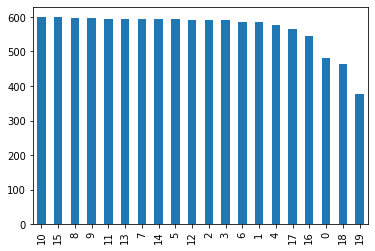

In [ ]:
data['target'].value_counts().plot(kind='bar');

In [ ]:
print(data.groupby('target').size().reset_index(name='count'))
# 각 레이블의 갯수 확인

    target  count
0        0    480
1        1    584
2        2    591
3        3    590
4        4    578
5        5    593
6        6    585
7        7    594
8        8    598
9        9    597
10      10    600
11      11    595
12      12    591
13      13    594
14      14    593
15      15    599
16      16    546
17      17    564
18      18    465
19      19    377


In [ ]:
newsdata_test = fetch_20newsgroups(subset='test', shuffle=True) # 'test'를 기재하면 테스트 데이터만 리턴한다.
train_email = data['email'] # 훈련 데이터의 본문 저장
train_label = data['target'] # 훈련 데이터의 레이블 저장
test_email = newsdata_test.data # 테스트 데이터의 본문 저장
test_label = newsdata_test.target # 테스트 데이터의 레이블 저장

    -  전처리 진행

In [ ]:
max_words = 10000 # 실습에 사용할 단어의 최대 개수
#  빈도수가 가장 높은 상위 max_words 개수만큼의 단어 사용
num_classes = 20 # 레이블의 수 (뉴스 주제 20개개ax_words = 10000 # 실습에 사용할 단어의 최대 개수
#  빈도수가 가장 높은 상위 max_words 개수만큼의 단어 사용
num_classes = 20 # 레이블의 수 (뉴스 주제 20개개)

In [ ]:
def prepare_data(train_data, test_data, mode): # 전처리 함수
    t = Tokenizer(num_words = max_words) # max_words 개수만큼의 단어만 사용한다.
    t.fit_on_texts(train_data)
    X_train = t.texts_to_matrix(train_data, mode=mode) # 샘플 수 × max_words 크기의 행렬 생성
    X_test = t.texts_to_matrix(test_data, mode=mode) # 샘플 수 × max_words 크기의 행렬 생성
    return X_train, X_test, t.index_word

In [ ]:
X_train, X_test, index_to_word = prepare_data(train_email, test_email, 'binary') # binary 모드로 변환
y_train = to_categorical(train_label, num_classes) # 원-핫 인코딩
y_test = to_categorical(test_label, num_classes) # 원-핫 인코딩

In [ ]:
print('훈련 샘플 본문의 크기 : {}'.format(X_train.shape))
print('훈련 샘플 레이블의 크기 : {}'.format(y_train.shape))
print('테스트 샘플 본문의 크기 : {}'.format(X_test.shape))
print('테스트 샘플 레이블의 크기 : {}'.format(y_test.shape))

훈련 샘플 본문의 크기 : (11314, 10000)
훈련 샘플 레이블의 크기 : (11314, 20)
테스트 샘플 본문의 크기 : (7532, 10000)
테스트 샘플 레이블의 크기 : (7532, 20)


In [ ]:
print('빈도수 상위 1번 단어 : {}'.format(index_to_word[1]))
print('빈도수 상위 9999번 단어 : {}'.format(index_to_word[9999]))

빈도수 상위 1번 단어 : the
빈도수 상위 9999번 단어 : mic


    - 다층 퍼셉트론 설계

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

def fit_and_evaluate(X_train, y_train, X_test, y_test):
    model = Sequential()
    model.add(Dense(256, input_shape=(max_words,), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))

    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    model.fit(X_train, y_train, batch_size=128, epochs=5, verbose=1, validation_split=0.1)
    score = model.evaluate(X_test, y_test, batch_size=128, verbose=0)
    return score[1]

In [ ]:
# 모델 훈련
modes = ['binary', 'count', 'tfidf', 'freq'] # 4개의 모드를 리스트에 저장.

for mode in modes: # 4개의 모드에 대해서 각각 아래의 작업을 반복한다.
    X_train, X_test, _ = prepare_data(train_email, test_email, mode) # 모드에 따라서 데이터를 전처리
    score = fit_and_evaluate(X_train, y_train, X_test, y_test) # 모델을 훈련하고 평가.
    print(mode+' 모드의 테스트 정확도:', score)